<h1>Data Exploration</h1>
<p>In this notebook we will perform a broad data exploration on the <code>Hitters</code> data set. Note that the aim of this exploration is not to be completely thorough; instead we would like to gain quick insights to help develop a first prototype. Upon analyzing the output of the prototype, we can analyze the data further to gain more insight.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/DataQualityReports.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p>We first read the comma-separated values (csv) <code>Hitters</code> file into a pandas DataFrame. To get a feeling for the data we display the top five rows of the DataFrame using the <code>head()</code> method and we show how many rows and columns the DataFrame has by using the <code>shape</code> attribute. We also show the <code>dtypes</code> attribute, which returns a pandas Series with the data type of each column.</p>

In [2]:
df = pd.read_csv("Hitters.csv", index_col = 0)
df.head()
df.shape
df.dtypes

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


(322, 20)

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

<p>Is appears that all the columns have the data type we would expect. We can perform another check to see if any values are missing in the DataFrame using its <code>isnull</code> method.</p>

In [3]:
df.reset_index()[df.reset_index().isnull().any(axis=1)]
df[df.isnull().any(axis=1)].shape

,index,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
15,-Billy Beane,183,39,3,20,15,11,3,201,42,...,20,16,11,A,W,118,0,0,NaN,A
18,-Bruce Bochte,407,104,6,57,43,65,12,5233,1478,...,643,658,653,A,W,912,88,9,NaN,A
22,-Bob Boone,22,10,1,4,2,1,6,84,26,...,9,9,3,A,W,812,84,11,NaN,A
30,-Bobby Grich,313,84,9,42,30,39,17,6890,1833,...,1033,864,1087,A,W,127,221,7,NaN,A
32,-Bob Horner,517,141,27,70,87,52,9,3571,994,...,545,652,337,N,W,1378,102,8,NaN,N
36,-Bobby Meacham,161,36,0,19,10,17,4,1053,244,...,156,86,107,A,E,70,149,12,NaN,A
38,-Ben Oglivie,346,98,5,31,53,30,16,5913,1615,...,784,901,560,A,E,0,0,0,NaN,A
39,-Bip Roberts,241,61,1,34,12,14,1,241,61,...,34,12,14,N,W,166,172,10,NaN,N
41,-Bill Russell,216,54,0,21,18,15,18,7318,1926,...,796,627,483,N,W,103,84,5,NaN,N


(59, 20)

<p>This shows that there are $59$ missing values in total that seem pretty randomly distributed accross the $322$ total rows. So the next step to be able to produce the data quality reports with our custom <code>createDataQualityReports</code> function is to organize our DataFrame by quantitative and categorical variables using hierarchical indexing.</p>

In [4]:
df.columns = pd.MultiIndex.from_tuples([('quantitative', 'AtBat'), ('quantitative', 'Hits'),
                                        ('quantitative', 'HmRun'), ('quantitative', 'Runs'),
                                        ('quantitative', 'RBI'), ('quantitative', 'Walks'),
                                        ('quantitative', 'Years'), ('quantitative', 'CAtBat'),
                                        ('quantitative', 'CHits'), ('quantitative', 'CHmRun'),
                                        ('quantitative', 'CRuns'), ('quantitative', 'CRBI'),
                                        ('quantitative', 'CWalks'), ('categorical', 'League'),
                                        ('categorical', 'Division'), ('quantitative', 'PutOuts'),
                                        ('quantitative', 'Assists'), ('quantitative', 'Errors'),
                                        ('quantitative', 'Salary'), ('categorical', 'NewLeague')],
                                        names=['type of variable', 'variable'])
df.sort_index(axis=1, level='type of variable', inplace=True)
df.head()

type of variable  categorical                  quantitative               \
variable             Division League NewLeague      Assists AtBat CAtBat   
-Andy Allanson              E      A         A           33   293    293   
-Alan Ashby                 W      N         N           43   315   3449   
-Alvin Davis                W      A         A           82   479   1624   
-Andre Dawson               E      N         N           11   496   5628   
-Andres Galarraga           E      N         N           40   321    396   

type of variable                                                            \
variable          CHits CHmRun CRBI CRuns CWalks Errors Hits HmRun PutOuts   
-Andy Allanson       66      1   29    30     14     20   66     1     446   
-Alan Ashby         835     69  414   321    375     10   81     7     632   
-Alvin Davis        457     63  266   224    263     14  130    18     880   
-Andre Dawson      1575    225  838   828    354      3  141    20     200   
-Andres Galarraga   101     12   46    48     33      4   87    10     805   

type of variable                               
variable          RBI Runs Salary Walks Years  
-Andy Allanson     29   30    NaN    14     1  
-Alan Ashby        38   24  475.0    39    14  
-Alvin Davis       72   66  480.0    76     3  
-Andre Dawson      78   65  500.0    37    11  
-Andres Galarraga  42   39   91.5    30     2

<p>We are now in the position to use our own <code>createDataQualityReports</code> function to create a data quality report for both the categorical and the quantitative variables.</p>

In [5]:
df_qr_quantitative, df_qr_categorical = createDataQualityReports(df)
df_qr_quantitative.name + ':'
df_qr_quantitative.round(2)
df_qr_categorical.name + ':'
df_qr_categorical.round(2)

'Quantitative Qualilty Report:'

,Count,Miss. (%),Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
variable,,,,,,,,,,
Assists,322,0.00,161,0.0,7.00,106.91,39.5,166.00,492.0,136.85
AtBat,322,0.00,247,16.0,255.25,380.93,379.5,512.00,687.0,153.40
CAtBat,322,0.00,314,19.0,816.75,2648.68,1928.0,3924.25,14053.0,2324.21
CHits,322,0.00,288,4.0,209.00,717.57,508.0,1059.25,4256.0,654.47
CHmRun,322,0.00,146,0.0,14.00,69.49,37.5,90.00,548.0,86.27
CRBI,322,0.00,262,0.0,88.75,330.12,220.5,426.25,1659.0,333.22
CRuns,322,0.00,261,1.0,100.25,358.80,247.0,526.25,2165.0,334.11
CWalks,322,0.00,248,0.0,67.25,260.24,170.5,339.25,1566.0,267.06
Errors,322,0.00,29,0.0,3.00,8.04,6.0,11.00,32.0,6.37


'Categorical Qualilty Report:'

,Count,Miss. (%),Card.,Mode,Mode Freq.,Mode (%),2nd Mode,2nd Mode Freq.,2nd Mode (%)
variable,,,,,,,,,
Division,322,0.0,2,W,165,51.24,E,157,48.76
League,322,0.0,2,A,175,54.35,N,147,45.65
NewLeague,322,0.0,2,A,176,54.66,N,146,45.34


<p>To further gain insight into the data, we use the <code>plotQuantitativeVariables</code> and <code>plotCategoricalVariables</code> functions the produce the frequency plots for each quantitative and categorical variable.</p>

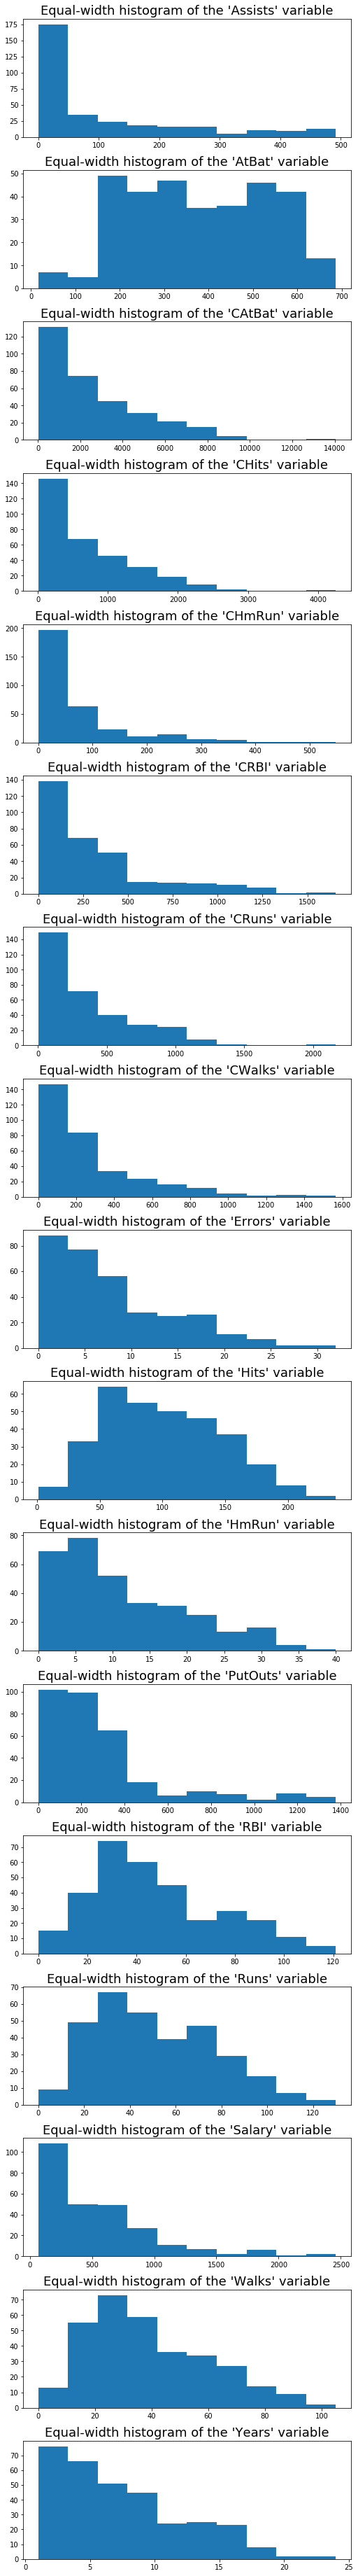

In [6]:
plotQuantitativeVariables(df.xs('quantitative', axis=1), height=3, width=7)

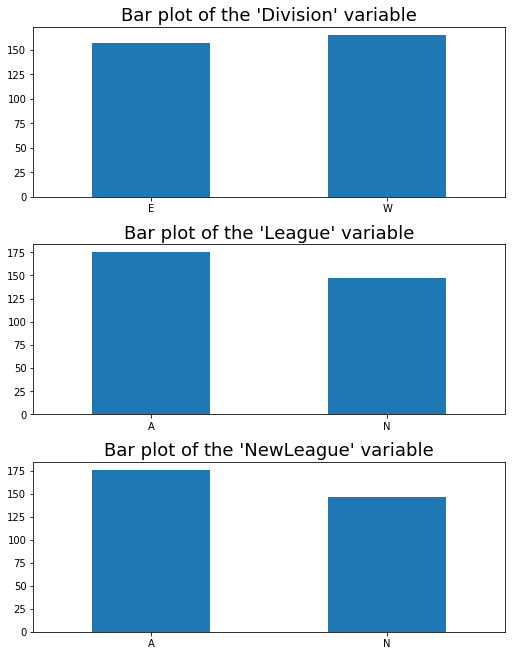

In [7]:
plotCategoricalVariables(df.xs('categorical', axis=1), height=3, width=7)

<p>We also compute the correlation matrix of the variables.</p>

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)